# Kaggle Competiton
- https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/overview
- Note : [Link](https://www.notion.so/parkjaeyoung/Kaggle-4147f4c9dd0b43e284d697c1cb6d7875?pvs=4https://www.notion.so/parkjaeyoung/Kaggle-4147f4c9dd0b43e284d697c1cb6d7875?pvs=4)

# Library 및 Data Load

In [20]:
pd.options.display.max_rows = 100
pd.set_option("display.max_rows", 100)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

import xgboost as xgb
from xgboost import XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

print('train data dim : {}'.format(df_train.shape))
print('sub data dim : {}'.format(df_test.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [3]:
display(df_train.head())
display(df_test.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


-------

#  EDA
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 각 변수들이 나타내는 의미를 살펴보겠습니다.
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

## 결측치 확인

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

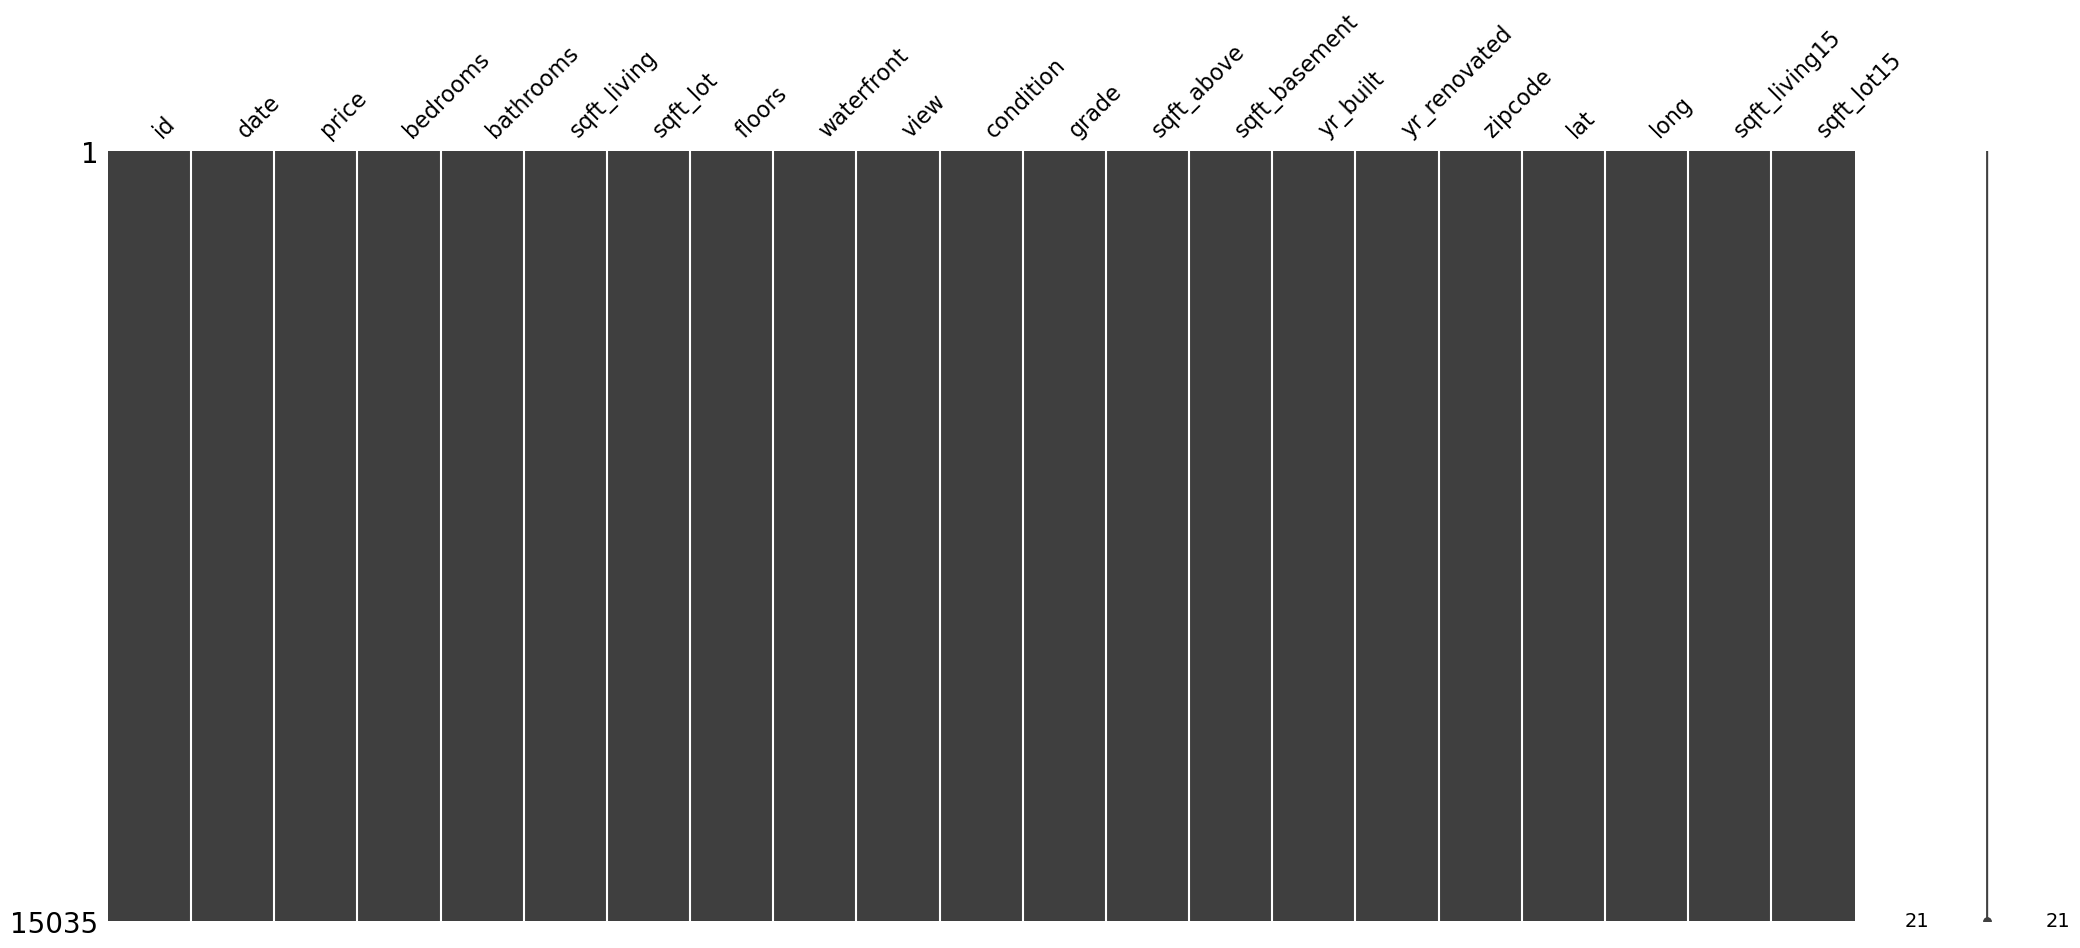

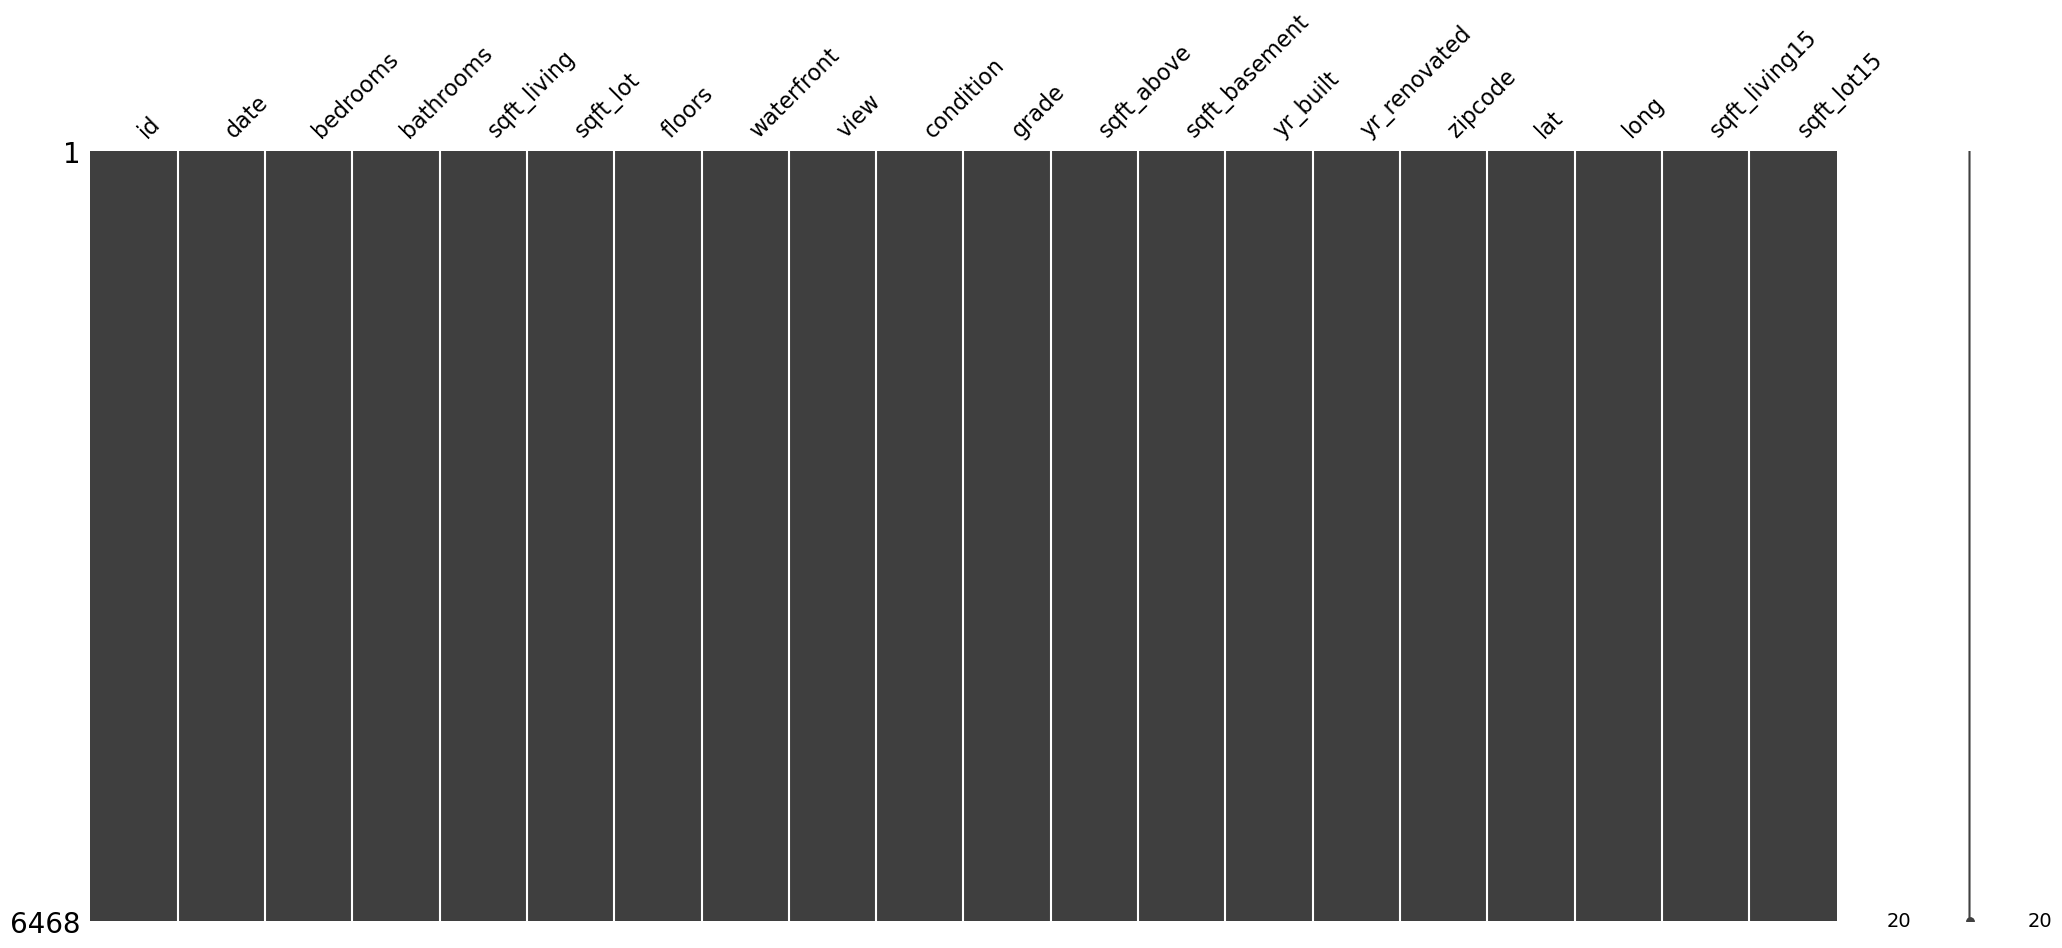

In [4]:
for df in [df_train,df_test]:
    display(df.isnull().sum())
    msno.matrix(df)

-----------

## EDA 1 - Correlation
 - 어떤 데이터가 Price 와 상관 관계가 높을까?

In [5]:
df = df_train.copy()

In [6]:
## To_Library
def date_to_y(x):
    str_ym = x[:6]
    y = str_ym[:4]
    return int(y)

def date_to_m(x):
    str_ym = x[:6]
    m = str_ym[4:]
    return int(m)

In [7]:
df['year'] = df['date'].apply(date_to_y)
df['month'] = df['date'].apply(date_to_m)

In [8]:
df.drop('date',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15035 non-null  float64
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [10]:
# continuous + sequential variables --> spearman
# 정규화 과정 뒤 pearson 재 탐색 필요
correlation = abs(df.corr(method='spearman')) 

<Axes: >

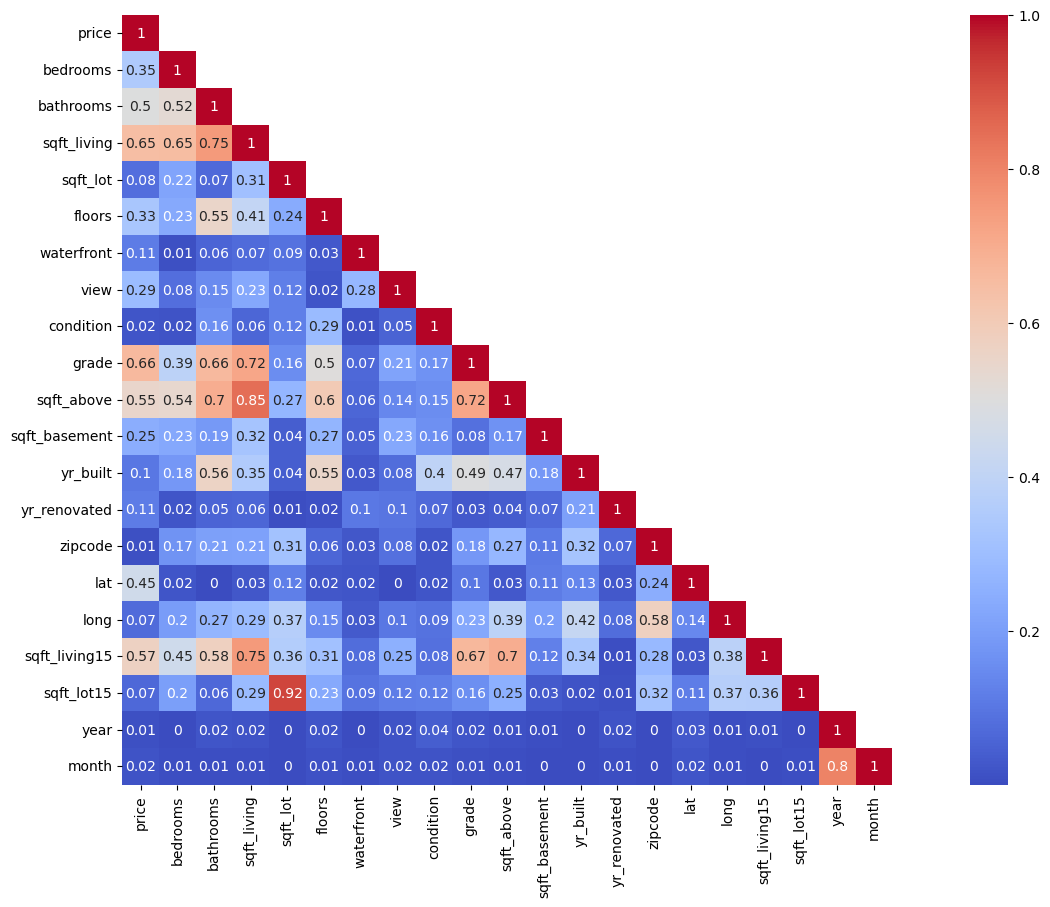

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(correlation,square=True,annot=np.round(correlation,2),mask=mask,cmap='coolwarm')

In [12]:
correlation.index.name = 'category'
correlation.T.index.name = 'relevant_category'

corr_df = pd.DataFrame(correlation.stack(),columns=['correaltion']).reset_index()
corr_df = corr_df.loc[corr_df['category'] != corr_df['relevant_category']]
corr_df['rank'] = corr_df.groupby('category')['correaltion'].rank('min',ascending=False).astype(int)
corr_df.sort_values('correaltion',ascending=False)

,category,relevant_category,correaltion,rank
102,sqft_lot,sqft_lot15,0.922681,1
382,sqft_lot15,sqft_lot,0.922681,1
213,sqft_above,sqft_living,0.846081,1
73,sqft_living,sqft_above,0.846081,1
439,month,year,0.801770,1
...,...,...,...,...
57,bathrooms,lat,0.000765,20
417,year,sqft_lot15,0.000680,20
397,sqft_lot15,year,0.000680,20
434,month,zipcode,0.000164,20


### [Price - features] correlation rank
 - 가격 연관성이 높게 항목
     - sqft_living(주거공간 크기) -> grad(집등급) -> sqft_above(지하실 제외 평방 미트) -> sqft_living15(2015 년 기준 집 크기) -> view (집 전망)-> bedroom (방 수) -> lat(위도)
 - 지어진 년도, 재건축 이슈와는 우선 크게 상관 관계가 없음 => 전처리 및 재조합 고민 필요
 - 위치 관련 피쳐는 전처리 필요해보임

In [24]:
corr_df[corr_df['category']=='price'].sort_values('rank')

,category,relevant_category,correaltion,rank
9,price,grade,0.662125,1
3,price,sqft_living,0.646482,2
17,price,sqft_living15,0.573777,3
10,price,sqft_above,0.547868,4
2,price,bathrooms,0.498989,5
15,price,lat,0.450692,6
1,price,bedrooms,0.350185,7
5,price,floors,0.328674,8
7,price,view,0.291720,9
11,price,sqft_basement,0.245304,10


### 주요 피처와 타 피처 간 연관도 (sqft_living) 
 - sqft_above -> bathrooms -> sqft_living15 -> grade -> bedrooms ...
 - 면적 관련 피처들과..당연.
 - Grade, Price
 - 그외 지어진 년도, 위도 와 상관 관계 의심

In [25]:
corr_df[corr_df['category']=='sqft_living'].sort_values('rank')

,category,relevant_category,correaltion,rank
73,sqft_living,sqft_above,0.846081,1
65,sqft_living,bathrooms,0.748612,2
80,sqft_living,sqft_living15,0.748214,3
72,sqft_living,grade,0.717800,4
64,sqft_living,bedrooms,0.649001,5
63,sqft_living,price,0.646482,6
68,sqft_living,floors,0.408417,7
75,sqft_living,yr_built,0.352702,8
74,sqft_living,sqft_basement,0.322338,9
67,sqft_living,sqft_lot,0.307893,10


### 주요 피처와 타 피처 간 연관도 (grade) 
- sqft_living -> sqft_above	 -> sqft_living15 -> price -> bathrooms ...
- 연관도가 높게 나온 항목 
    - 집 면적 관련 피처들(sqft_living,sqft_above,sqft_living15,bathrooms,floors)
    - 지어진 년도 (yr_build)
    - 위치(long)
    - 전망
- 재건축 관련은 의미가 없어보임

In [26]:
corr_df[corr_df['category']=='grade'].sort_values('rank')

,category,relevant_category,correaltion,rank
192,grade,sqft_living,0.717800,1
199,grade,sqft_above,0.715100,2
206,grade,sqft_living15,0.665039,3
189,grade,price,0.662125,4
191,grade,bathrooms,0.661112,5
194,grade,floors,0.504506,6
201,grade,yr_built,0.494338,7
190,grade,bedrooms,0.386833,8
205,grade,long,0.227766,9
196,grade,view,0.211469,10


### 주요 피처와 타 피처 간 연관도 (lat) 
- 위도(lat) - > zipcode -> log -> yl_build
- 연관도가 높게 나온 항목 
    - 가격
    - zipcode, long
    - 지어진 년도 (yr_build) : 위치 별로 주로 지어진 년도가 차이가 있다. 
    - 면적(sqft_lot) , living 이 아니라 lot 임! , 위도에 따라 부지 면적 차이가 있다. 땅값 때문일 걸로 추정
    - grade
- 재건축 관련은 의미가 없어보임

In [29]:
corr_df[corr_df['category']=='lat'].sort_values('rank')

,category,relevant_category,correaltion,rank
315,lat,price,0.450692,1
329,lat,zipcode,0.243199,2
331,lat,long,0.141131,3
327,lat,yr_built,0.134866,4
319,lat,sqft_lot,0.118702,5
333,lat,sqft_lot15,0.113435,6
326,lat,sqft_basement,0.111090,7
324,lat,grade,0.100038,8
334,lat,year,0.030900,9
328,lat,yr_renovated,0.028976,10


In [30]:
del df

## PreProcessing_1
    - df : df_train + df_test 
    - df_train_processed : price 상관 관계 파악용

In [31]:
# 데이터 전처리 : df_train _ df_test Merge 위해 Price 값 분리 
len_train = df_train.shape[0]
df_train_processed = df_train.drop('price',axis=1)


# df 생성, 테스트를 위해 id 값 구분 후 삭제 
df = pd.concat([df_train_processed,df_test],axis=0)
test_id = df.iloc[len_train:,0]

# date -> year , month 
for df_temp in [df_train_processed,df]:

    del df_temp['id']

    # 년 월 컬럼 생성 후 , date Column 삭제 
    df_temp['year'] = df_temp['date'].apply(date_to_y)
    df_temp['month'] = df_temp['date'].apply(date_to_m)
    del df_temp['date']

In [32]:
# df_train_process Log Scaling
y_train = np.log1p(df_train['price'].values)


In [47]:
df_train_processed['price'] = y_train # 분석용

## Feature_Importance(Random_Forest Model)

 - Feature Importance 가 잘 나온다고 알려진 랜덤 포레스트 모델로 우선 Corr-ReCheck
 - corr() 차이
    1. grade 보다 위도가 더 높게 나왔다. (zipcode, long 도 상위권)
    2. 면적은 역시 중요하다.
    3. 지어진 년도 

In [37]:
model = RandomForestRegressor(n_estimators=100, 
                              max_depth=10,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features=5,
                              n_jobs=-1,
                              random_state=36)

model.fit(df_train_processed,y_train)

feature_names = df_train_processed.columns
importances = model.feature_importances_

for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")


In [41]:
df_feature_importance = pd.DataFrame([importances],columns=feature_names)
df_feature_importance.T.sort_values(by=0,ascending=False)

,0
lat,0.259913
grade,0.214227
sqft_living,0.165257
sqft_living15,0.088227
sqft_above,0.065556
bathrooms,0.039344
long,0.027108
zipcode,0.024957
yr_built,0.024178
view,0.019121


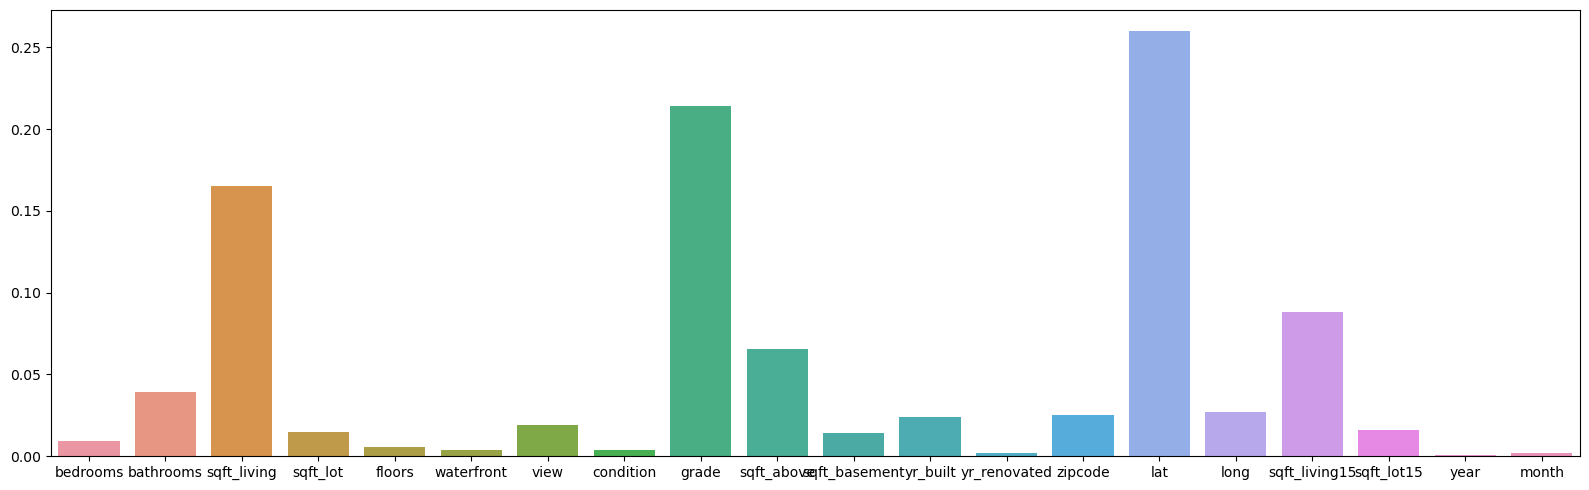

In [42]:
plt.figure(figsize=(16,5))
sns.barplot(x=feature_names,y=importances)
plt.tight_layout()
plt.show()

## EDA2 -Visualization : Plot(COUNT,BOX,KDE)

### EDA 용 컬럼 재정렬(columns order by corr)

In [26]:
# 1. Price 와 Correaltion 높은 Column 기준으로 Column 재정렬
# 2. 도메인 비슷한 Column 묶음 

**가설**   
  
    1. Grade 는 주요한 피쳐다
    2. sqft_living 과 sqft_ 타 컬럼 차이 발견하기?
    3. lat, long 은 corr 차이가 있었다. 다시 확인 
    4. view, waterfront 는 one-hot enconding  or categorical 여부
    5. yr_built , condition 는 기대치 보다 약한 상관성이 나왔는데,
        1.  yr_built 대비 condition 를 봐야하지 않을까? 
        2. 같은 차원에서 yr_renovated 대비 condition 을 봐야하지 않을까?
    6. zipcode 는 그룹화 시켜서 평균, 분산을 봐야한다.

In [27]:
# 위 Price - Col 상관관계 DF 에서 컬럼 순서 축출 
corr_df_price = corr_df[corr_df['category']=='price'].sort_values('rank')
eda_col = corr_df_price['relevant_category'].to_list()
eda_col

['grade',
 'sqft_living',
 'sqft_living15',
 'sqft_above',
 'bathrooms',
 'lat',
 'bedrooms',
 'floors',
 'view',
 'sqft_basement',
 'waterfront',
 'yr_renovated',
 'yr_built',
 'sqft_lot',
 'long',
 'sqft_lot15',
 'condition',
 'month',
 'zipcode',
 'year']

In [56]:
eda_col = [ 'grade', # 등급
            'sqft_living','sqft_above','sqft_basement', 'sqft_lot', # 면적 (제외)'sqft_living15', 'sqft_lot15'
            'bathrooms', 'bedrooms','floors', # 방 & 층
            'lat','long', # 위치
             'view', 'waterfront', #전망
             'yr_built',  #건축 & 재건축 여부  제외 'yr_renovated'
             'condition', # 집 컨디션 
             'month', 'year' # 거래 월 , 년
             #'zipcode' # 우편번호 
            ]

len(eda_col)

16

### COUNT Plot

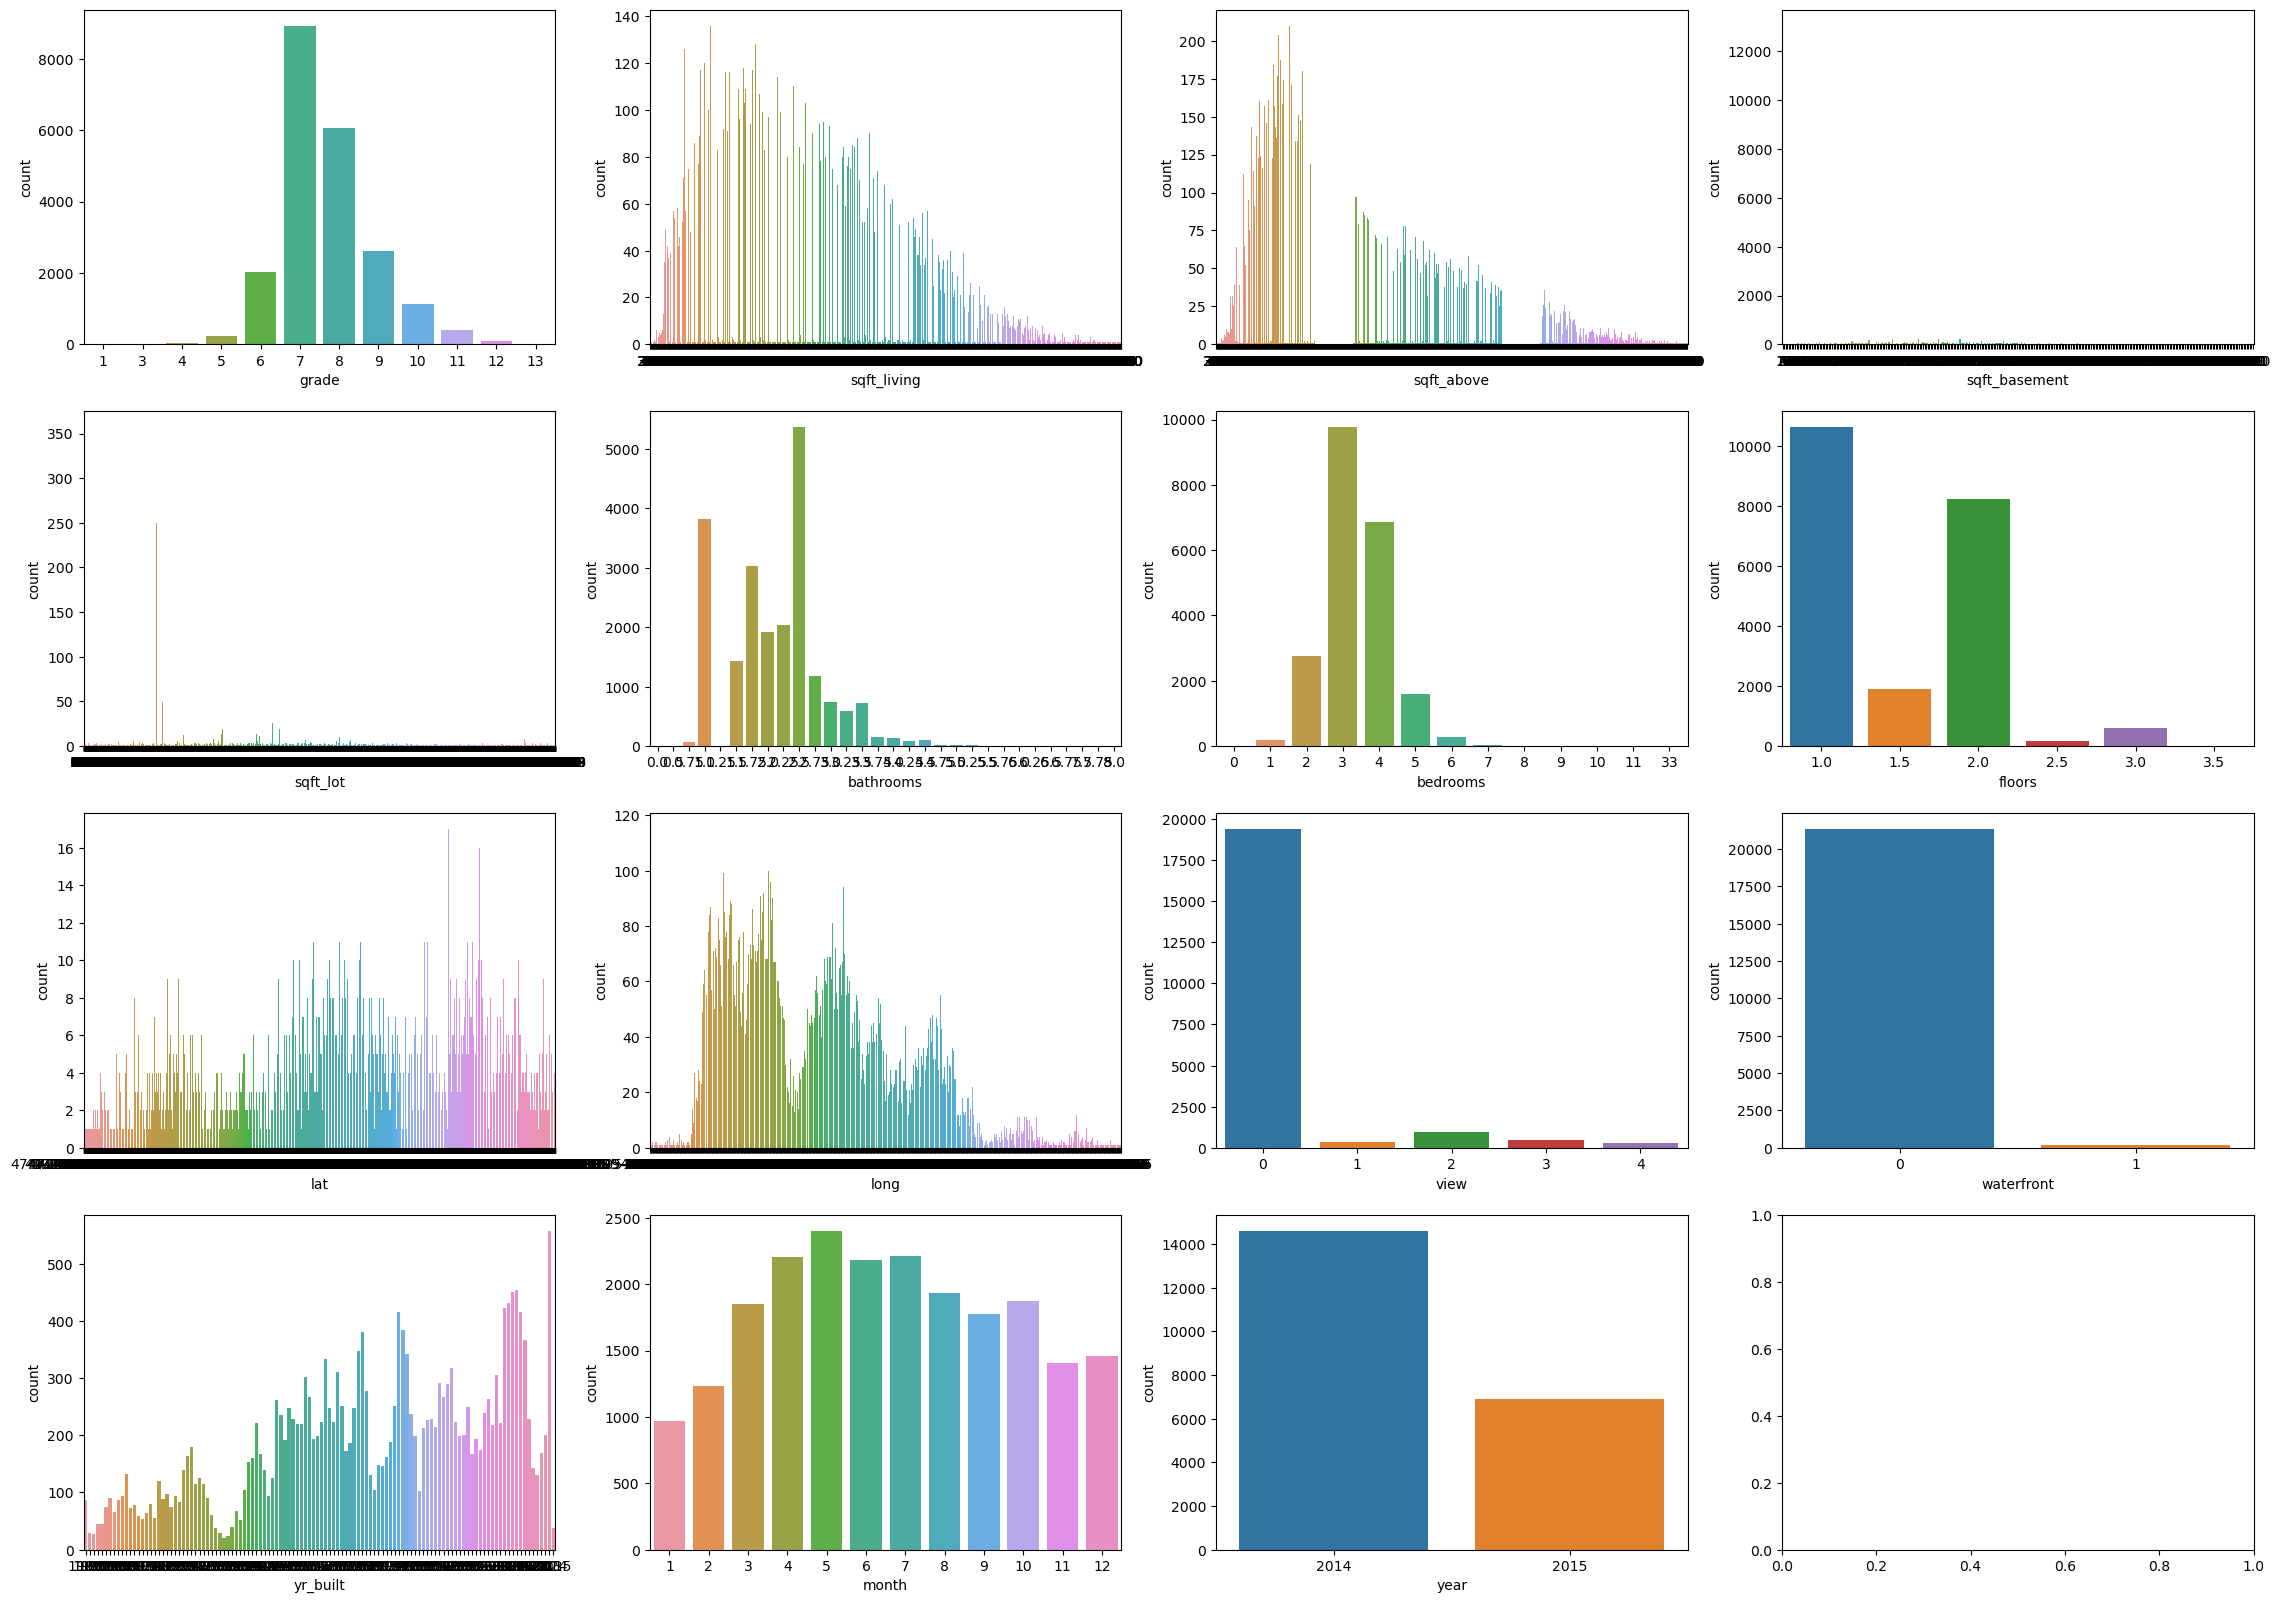

In [45]:
nrows ,ncols = 4 , 4
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(eda_col):
            break
        sns.countplot(data=df,x=eda_col[idx],ax=ax[r,c])
        idx += 1

### BOX Plot (df_train ,price)
  - price 와 관계를 보기 위해 (df_train_processed 사용)

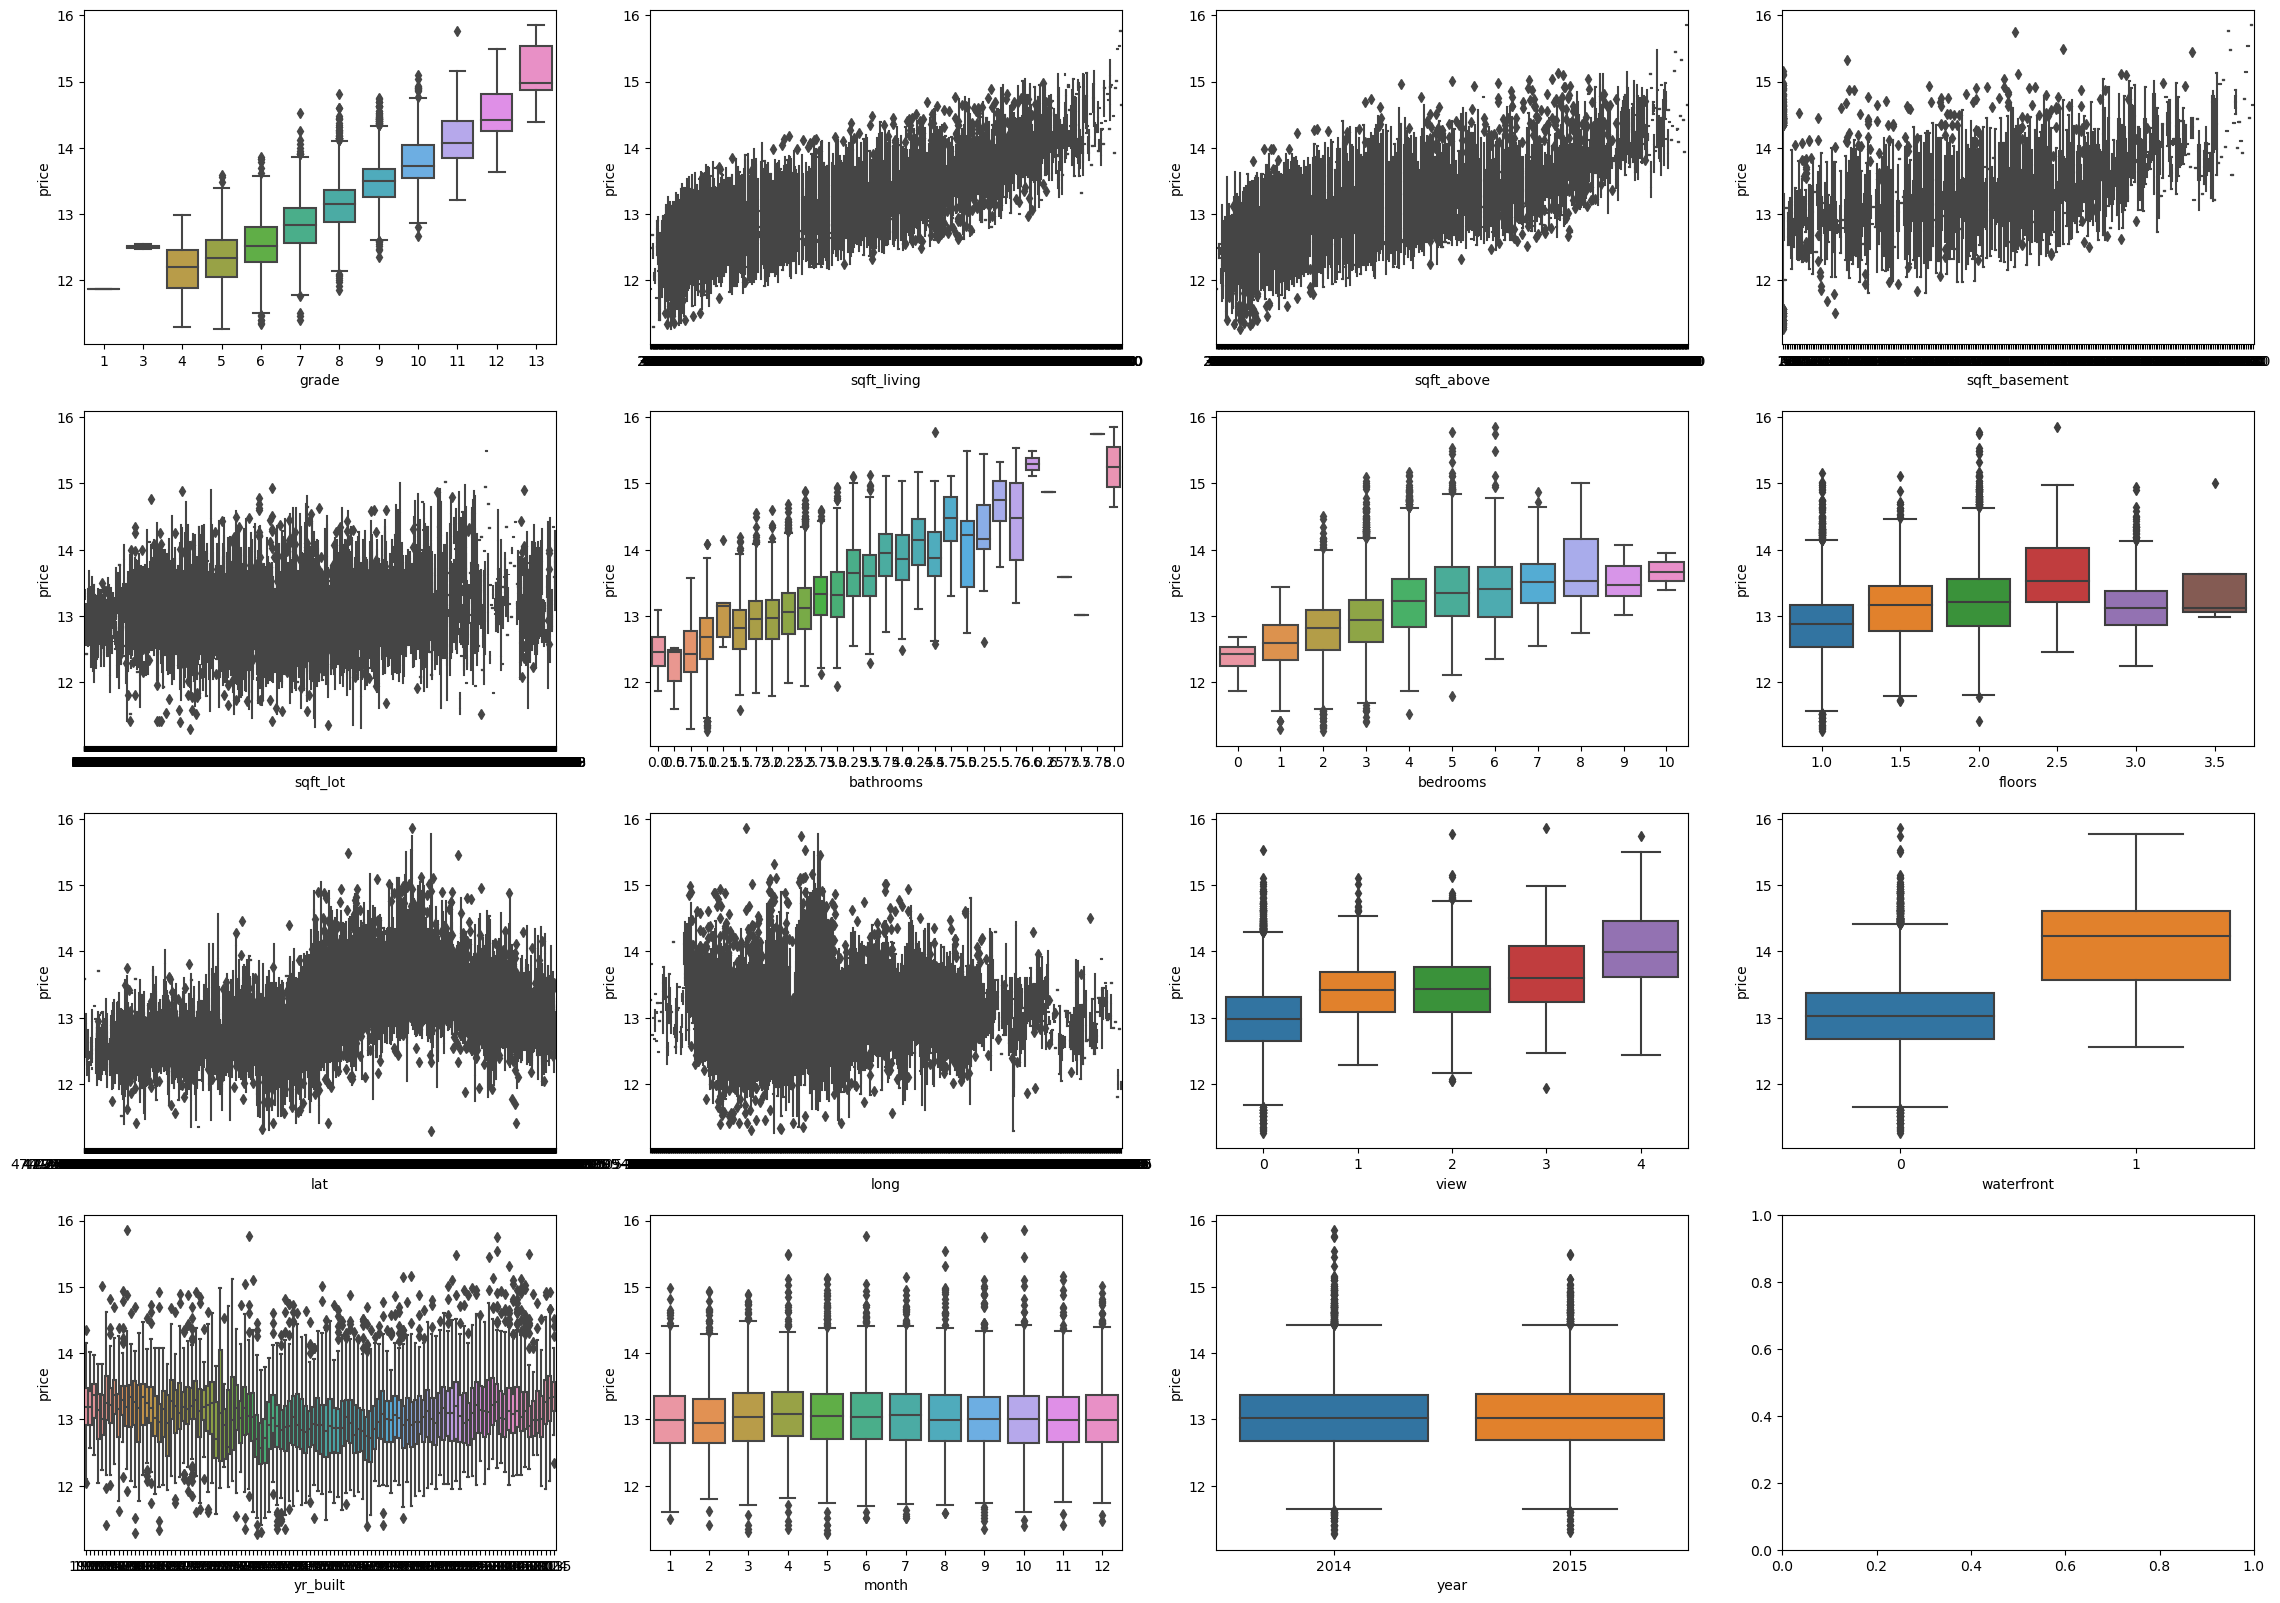

In [48]:
nrows ,ncols = 4 , 4
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(eda_col):
            break
        sns.boxplot(data=df_train_processed,x=eda_col[idx],y='price',ax=ax[r,c])
        idx += 1

### KDE Plot (Price)

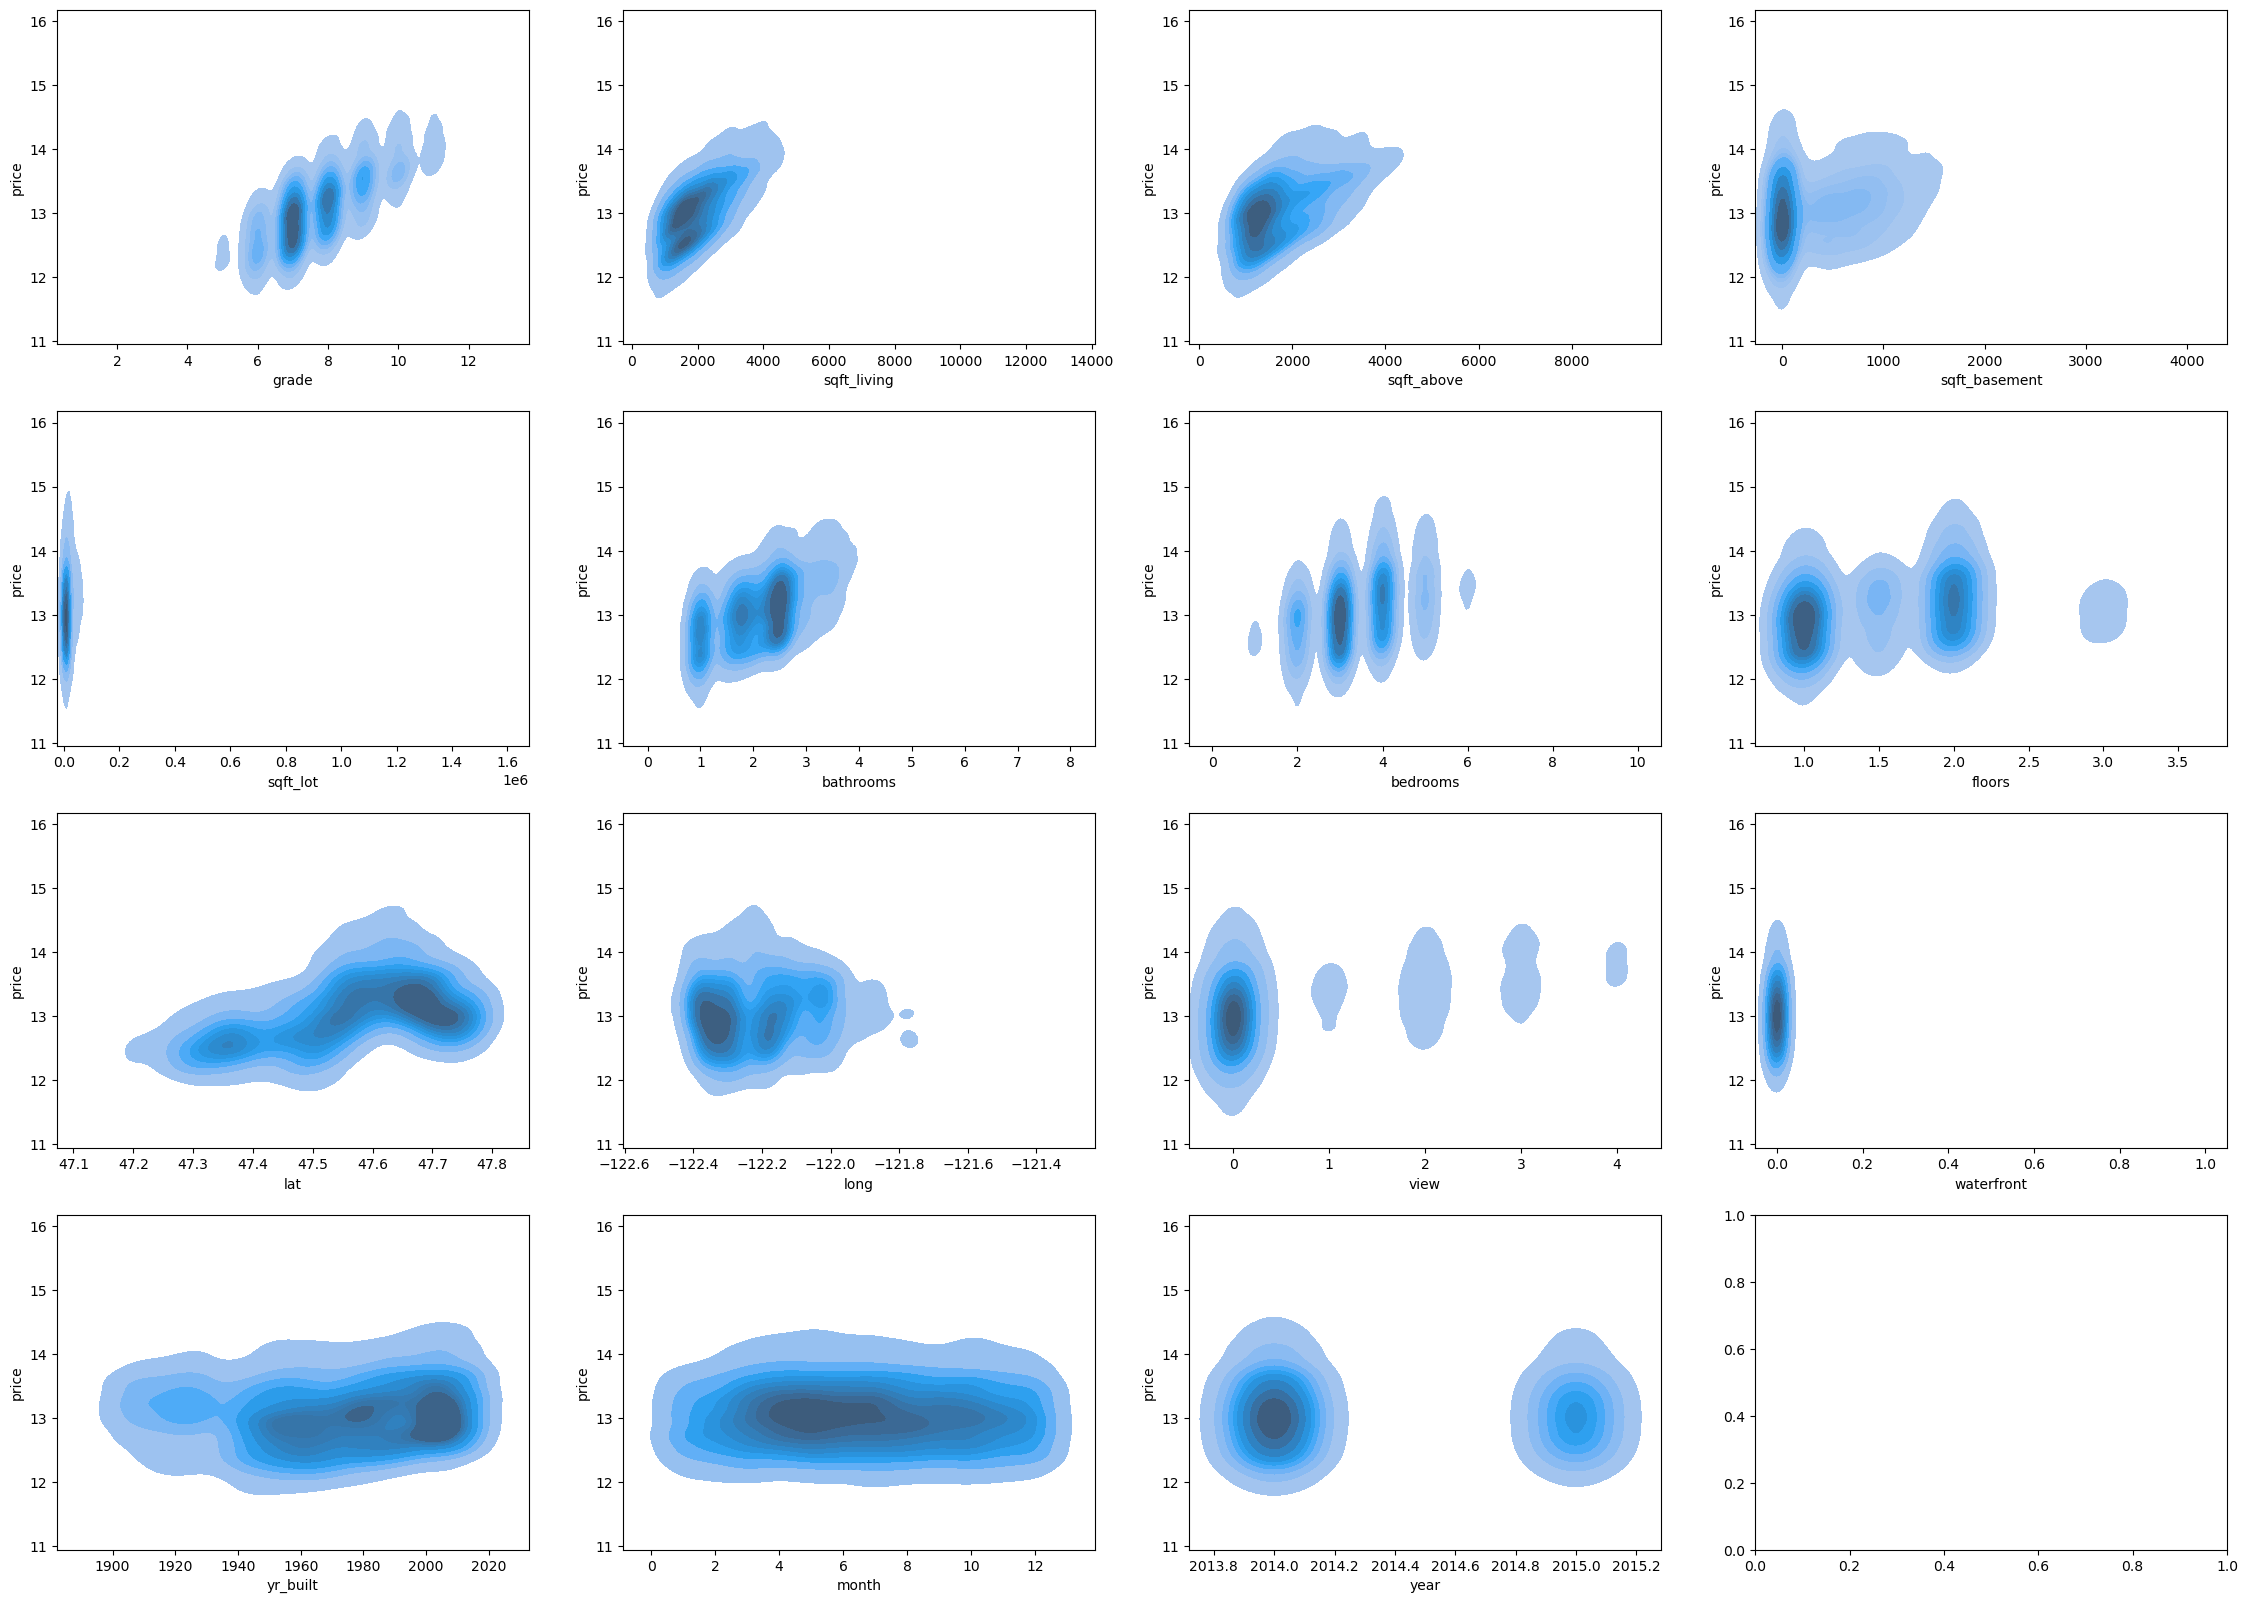

In [50]:
nrows ,ncols = 4 , 4
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(eda_col):
            break
        sns.kdeplot(data=df_train_processed,x=eda_col[idx],y='price',ax=ax[r,c],fill=True)
        idx += 1

### KDE Plot2

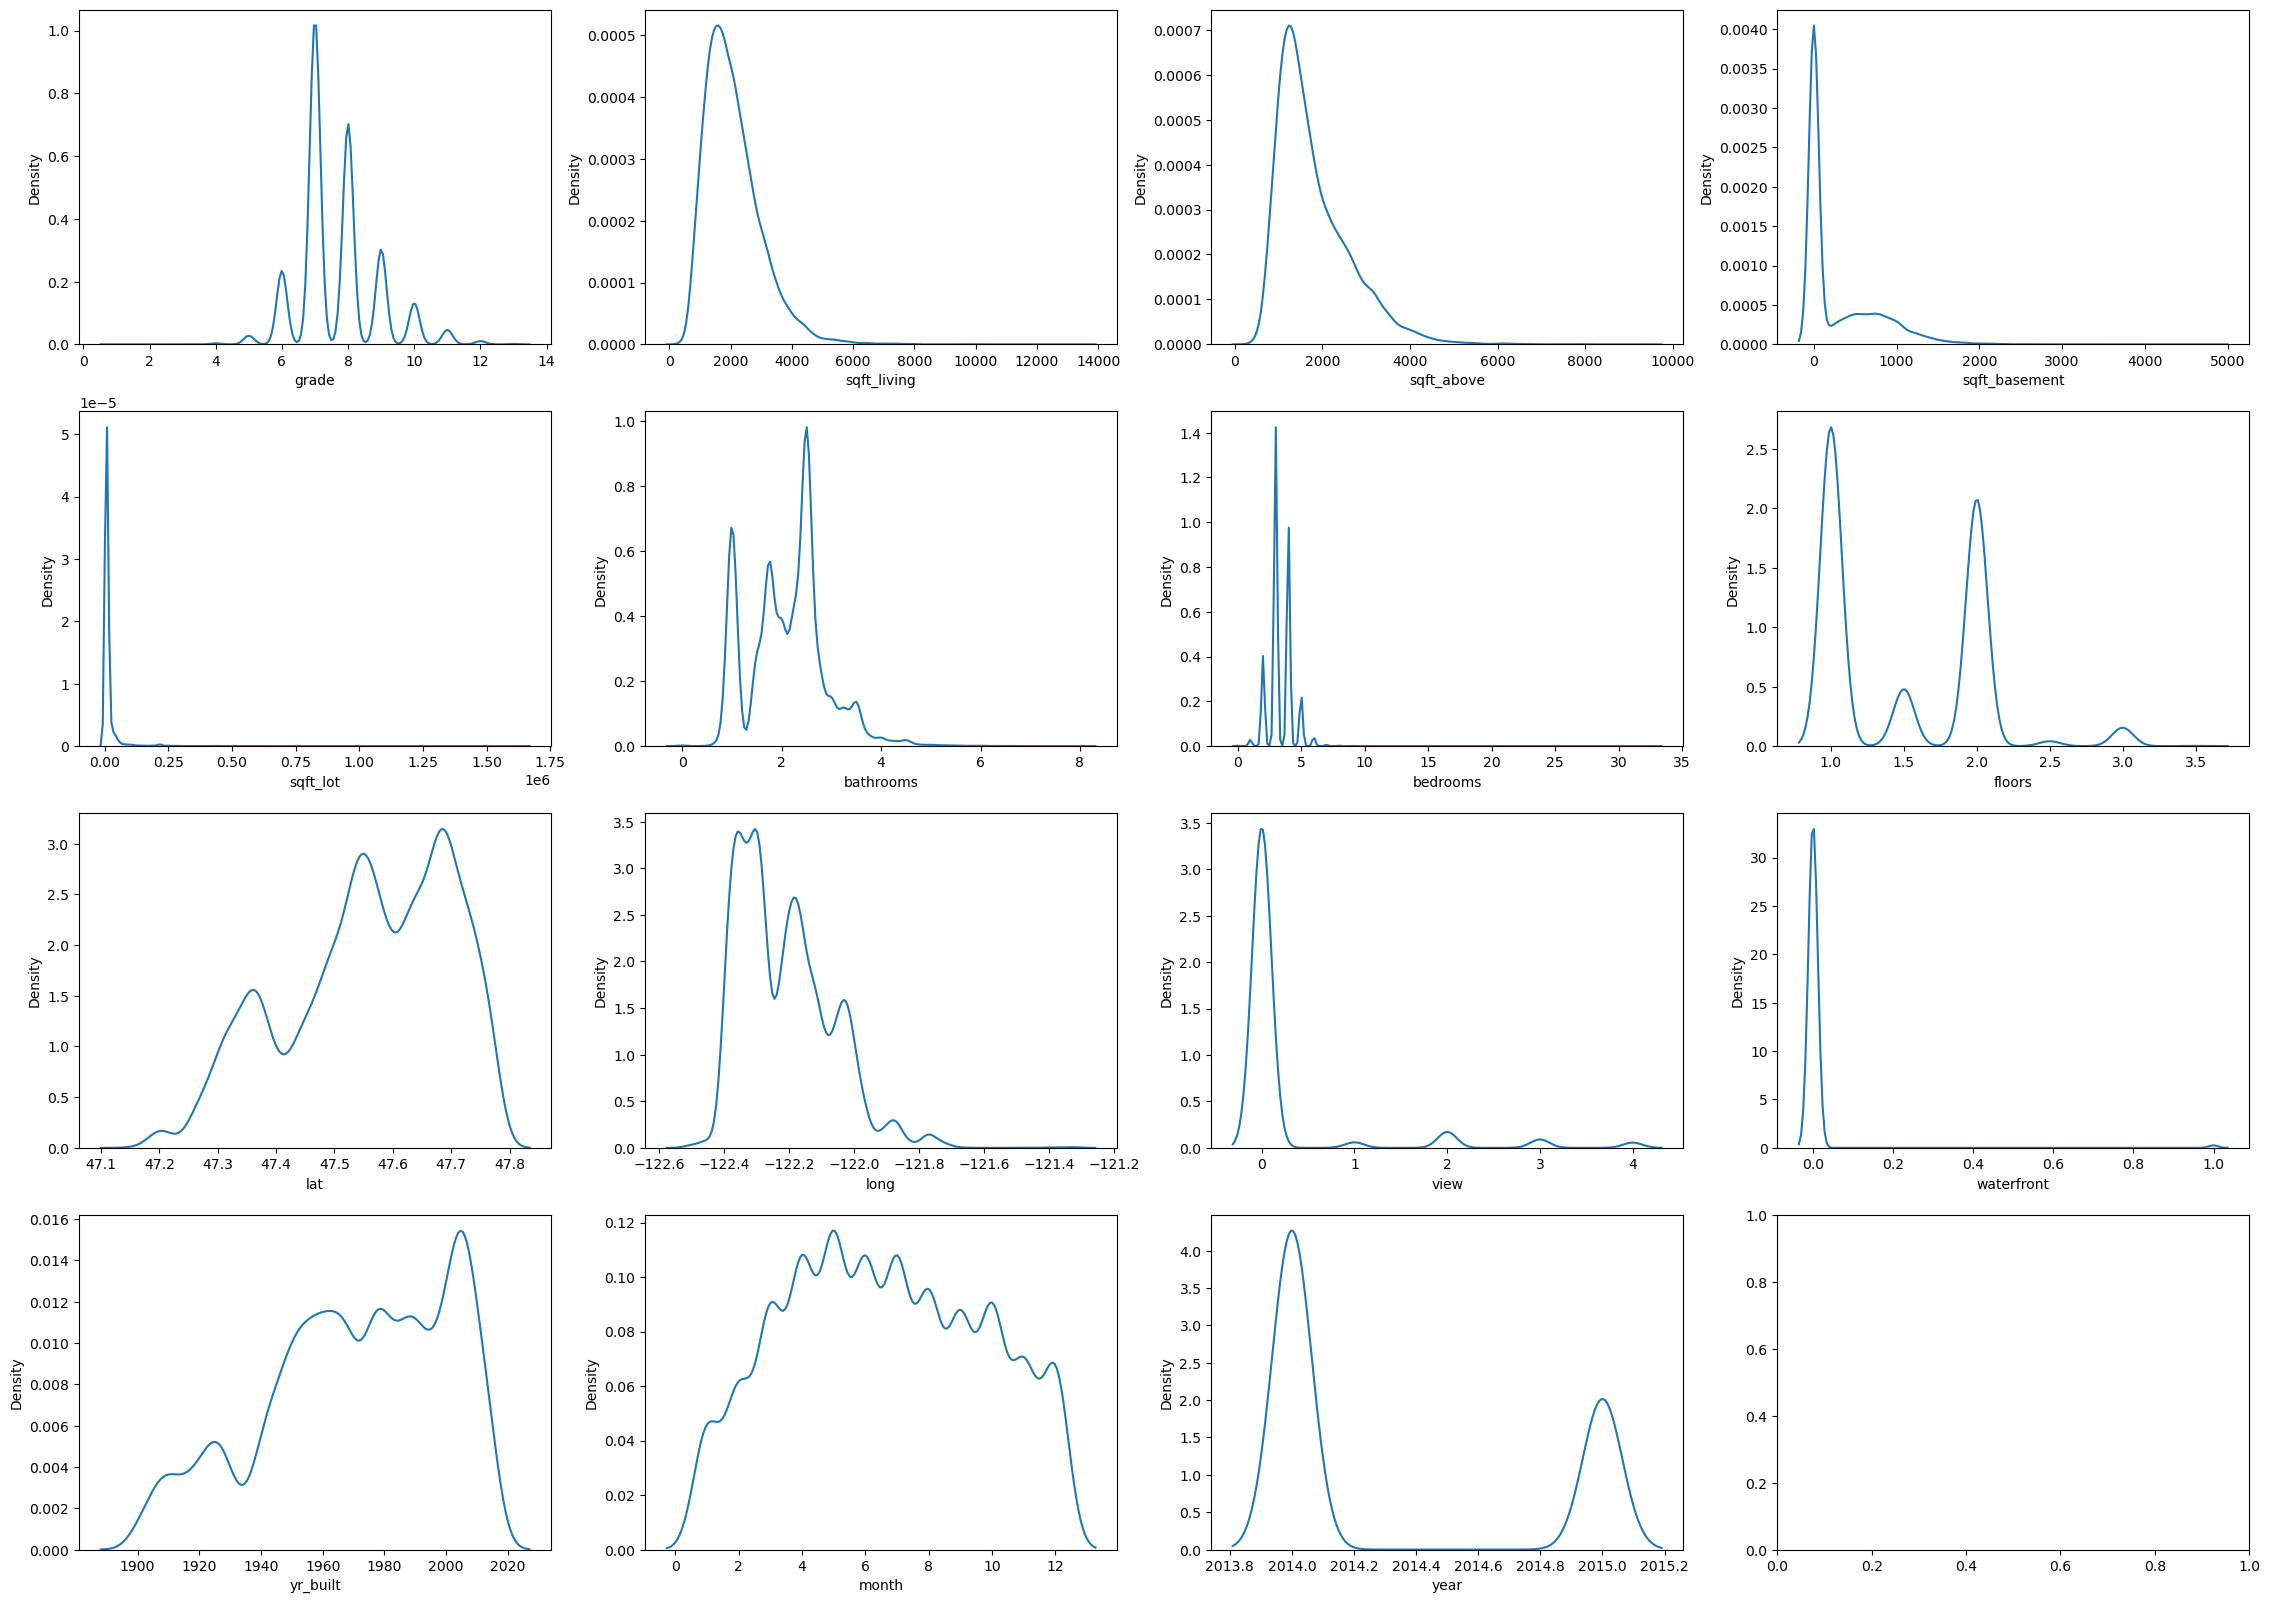

In [51]:
nrows ,ncols = 4 , 4
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(eda_col):
            break
        sns.kdeplot(data=df[eda_col[idx]],ax=ax[r,c])
        idx += 1

### KDE Plot2 - Condition

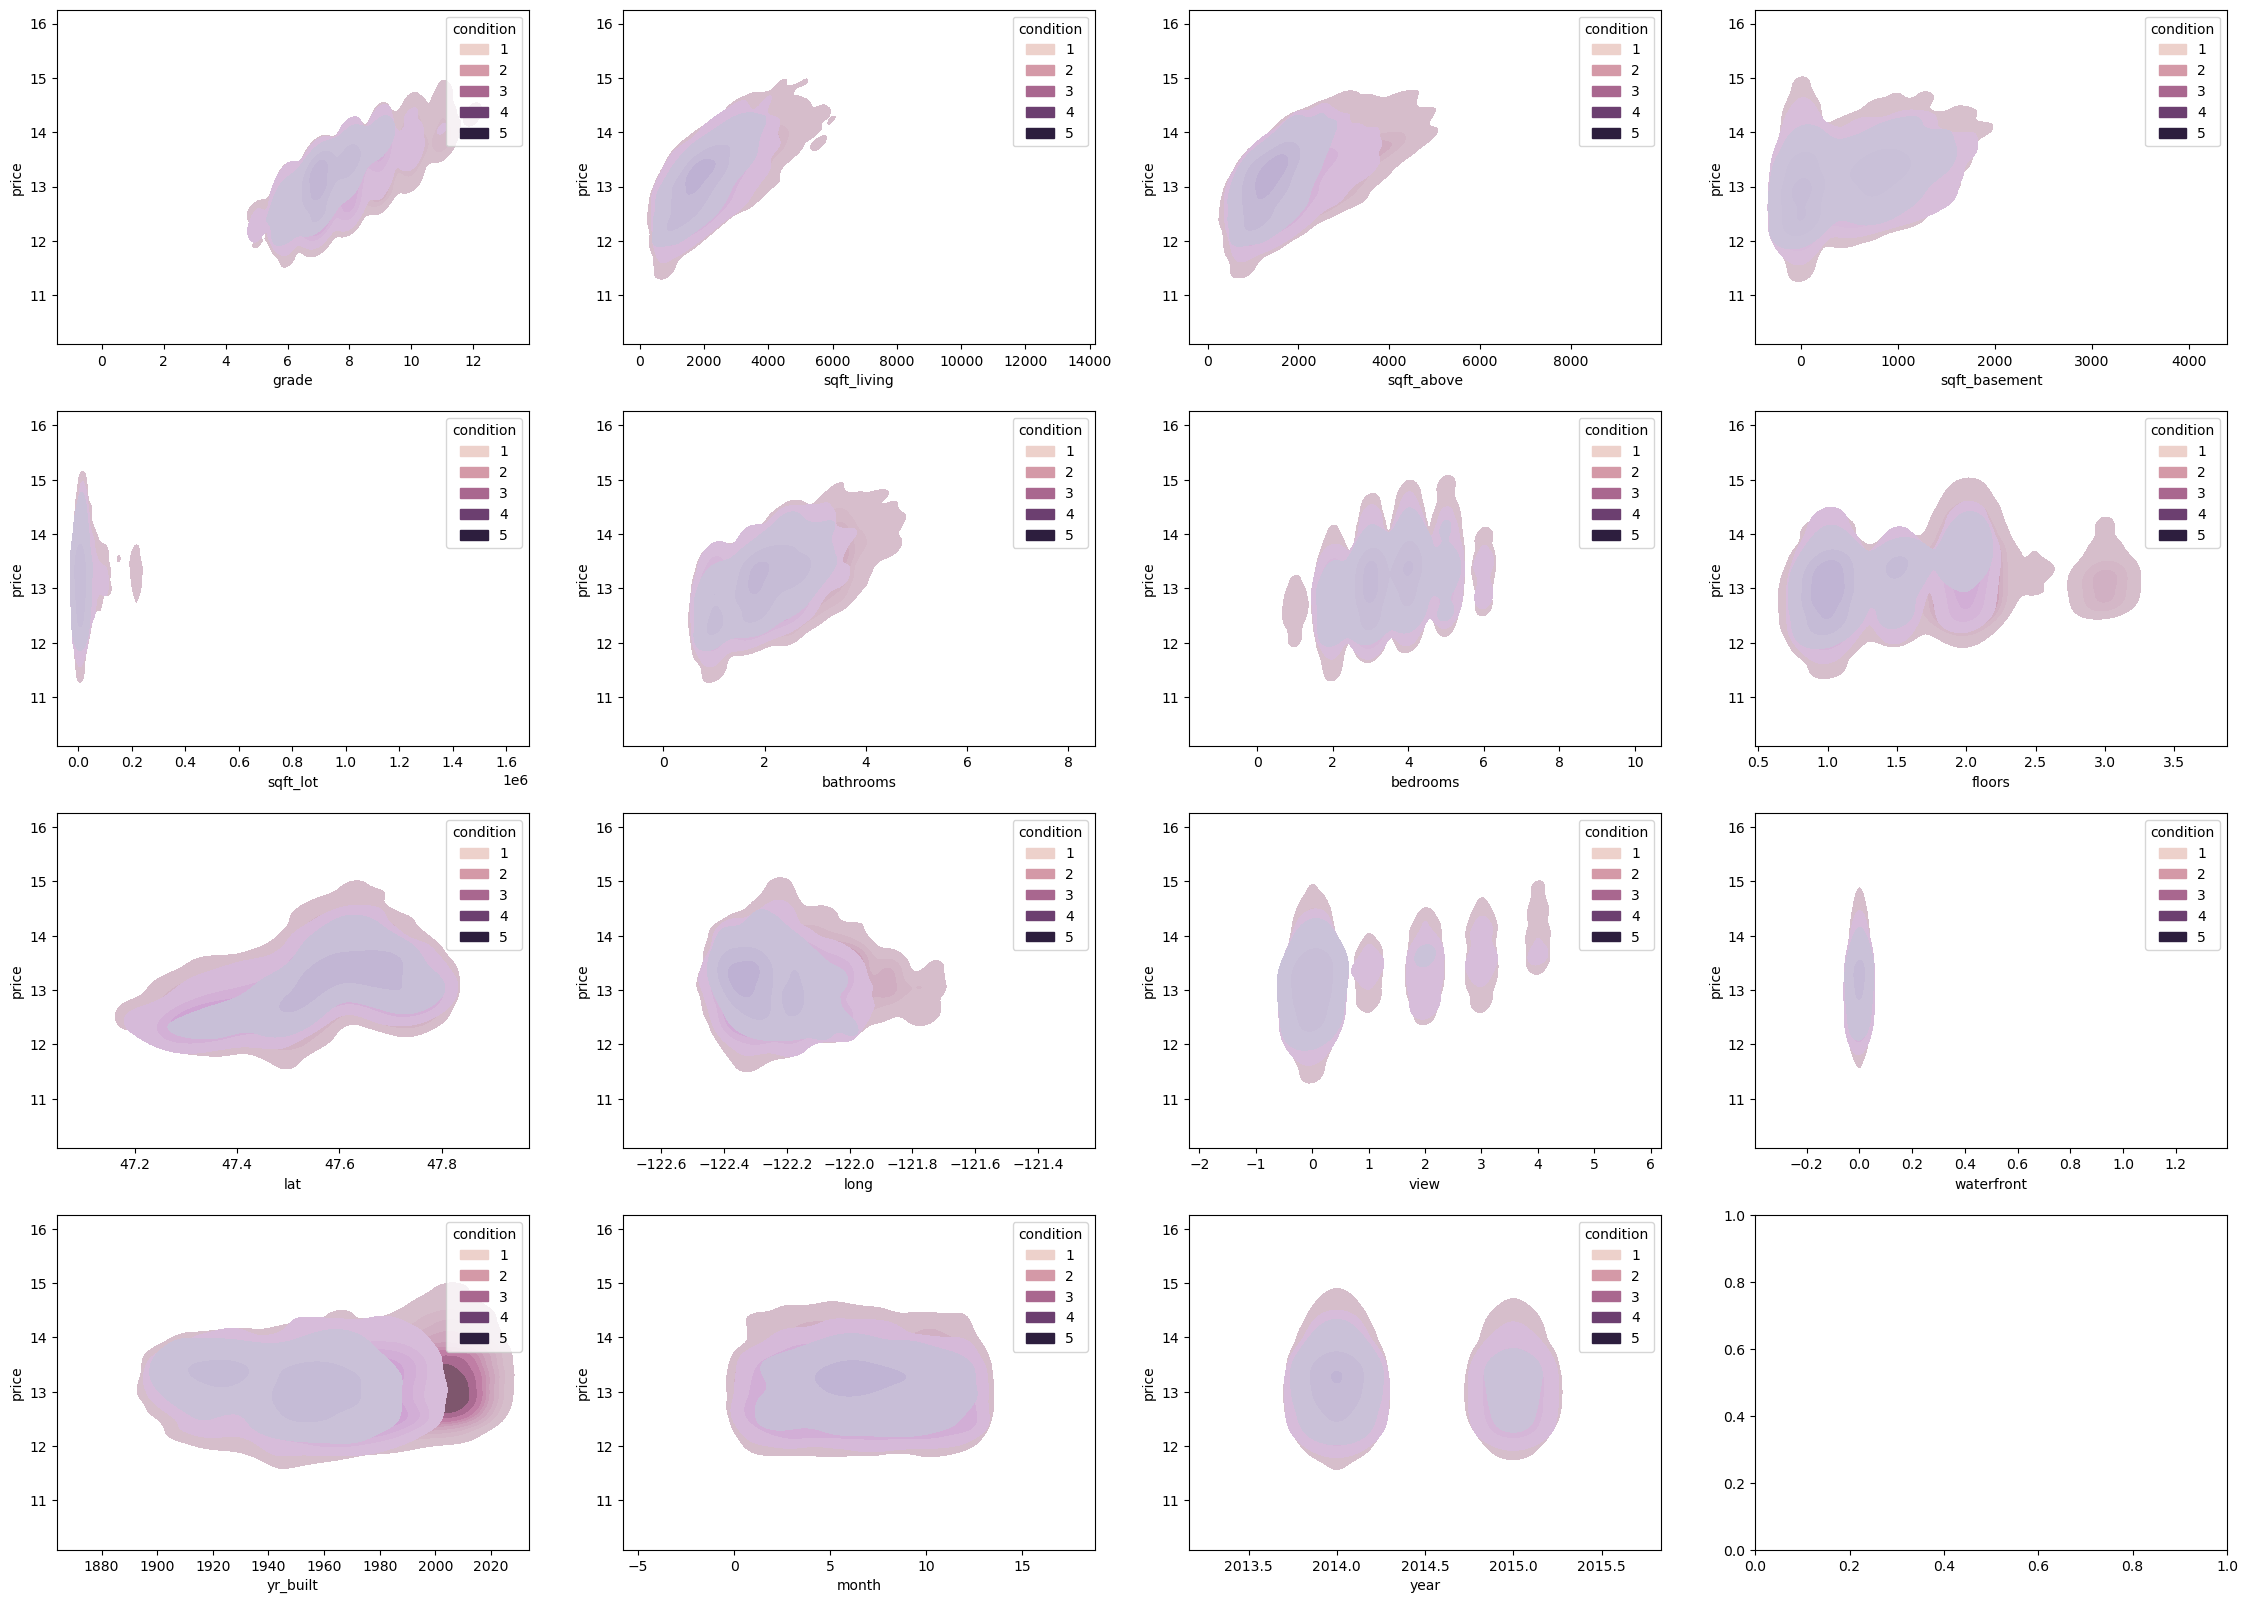

In [58]:
tmp_col = eda_col
eda_col.remove('condition')

nrows ,ncols = 4 , 4
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(eda_col):
            break
        sns.kdeplot(data=df_train_processed,x=eda_col[idx],y='price',hue='condition',ax=ax[r,c],fill=True)
        idx += 1

In [54]:
eda_col = tmp_col

# 데이터 전처리(PreProcessing)

    - (*) 1차 시도 : All Feature -> Log Scaling **
    - 2차 시도 : Feature Selection -> Log Scaling -> PCA() -> Outliesr
    - 3차 시도 : Feature Selection + Combination Feature -> Log Scaling -> PCA()

#카테고리 특성 분류
 - Category_feature : 'grade', 'condition','view', 'waterfront',  'year', 'month','zip_code'
 - Log_feature      : 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built'
 - Geo_feature      : 'lat', 'long'

In [60]:
category_col = ['grade', 'condition','view', 'waterfront', 'year', 'month','zipcode']
log_col = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built']
geo_col = ['lat', 'long']

selected_col = category_col + log_col + geo_col

selected_col

['grade',
 'condition',
 'view',
 'waterfront',
 'year',
 'month',
 'zipcode',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long']

## Label Encoding

In [61]:
category_col

['grade', 'condition', 'view', 'waterfront', 'year', 'month', 'zipcode']

In [62]:
le = LabelEncoder()

for col in category_col:
    le.fit(df[col])
    df[col] = le.transform(df[col])

## Log Scaling

In [63]:
log_col

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built']

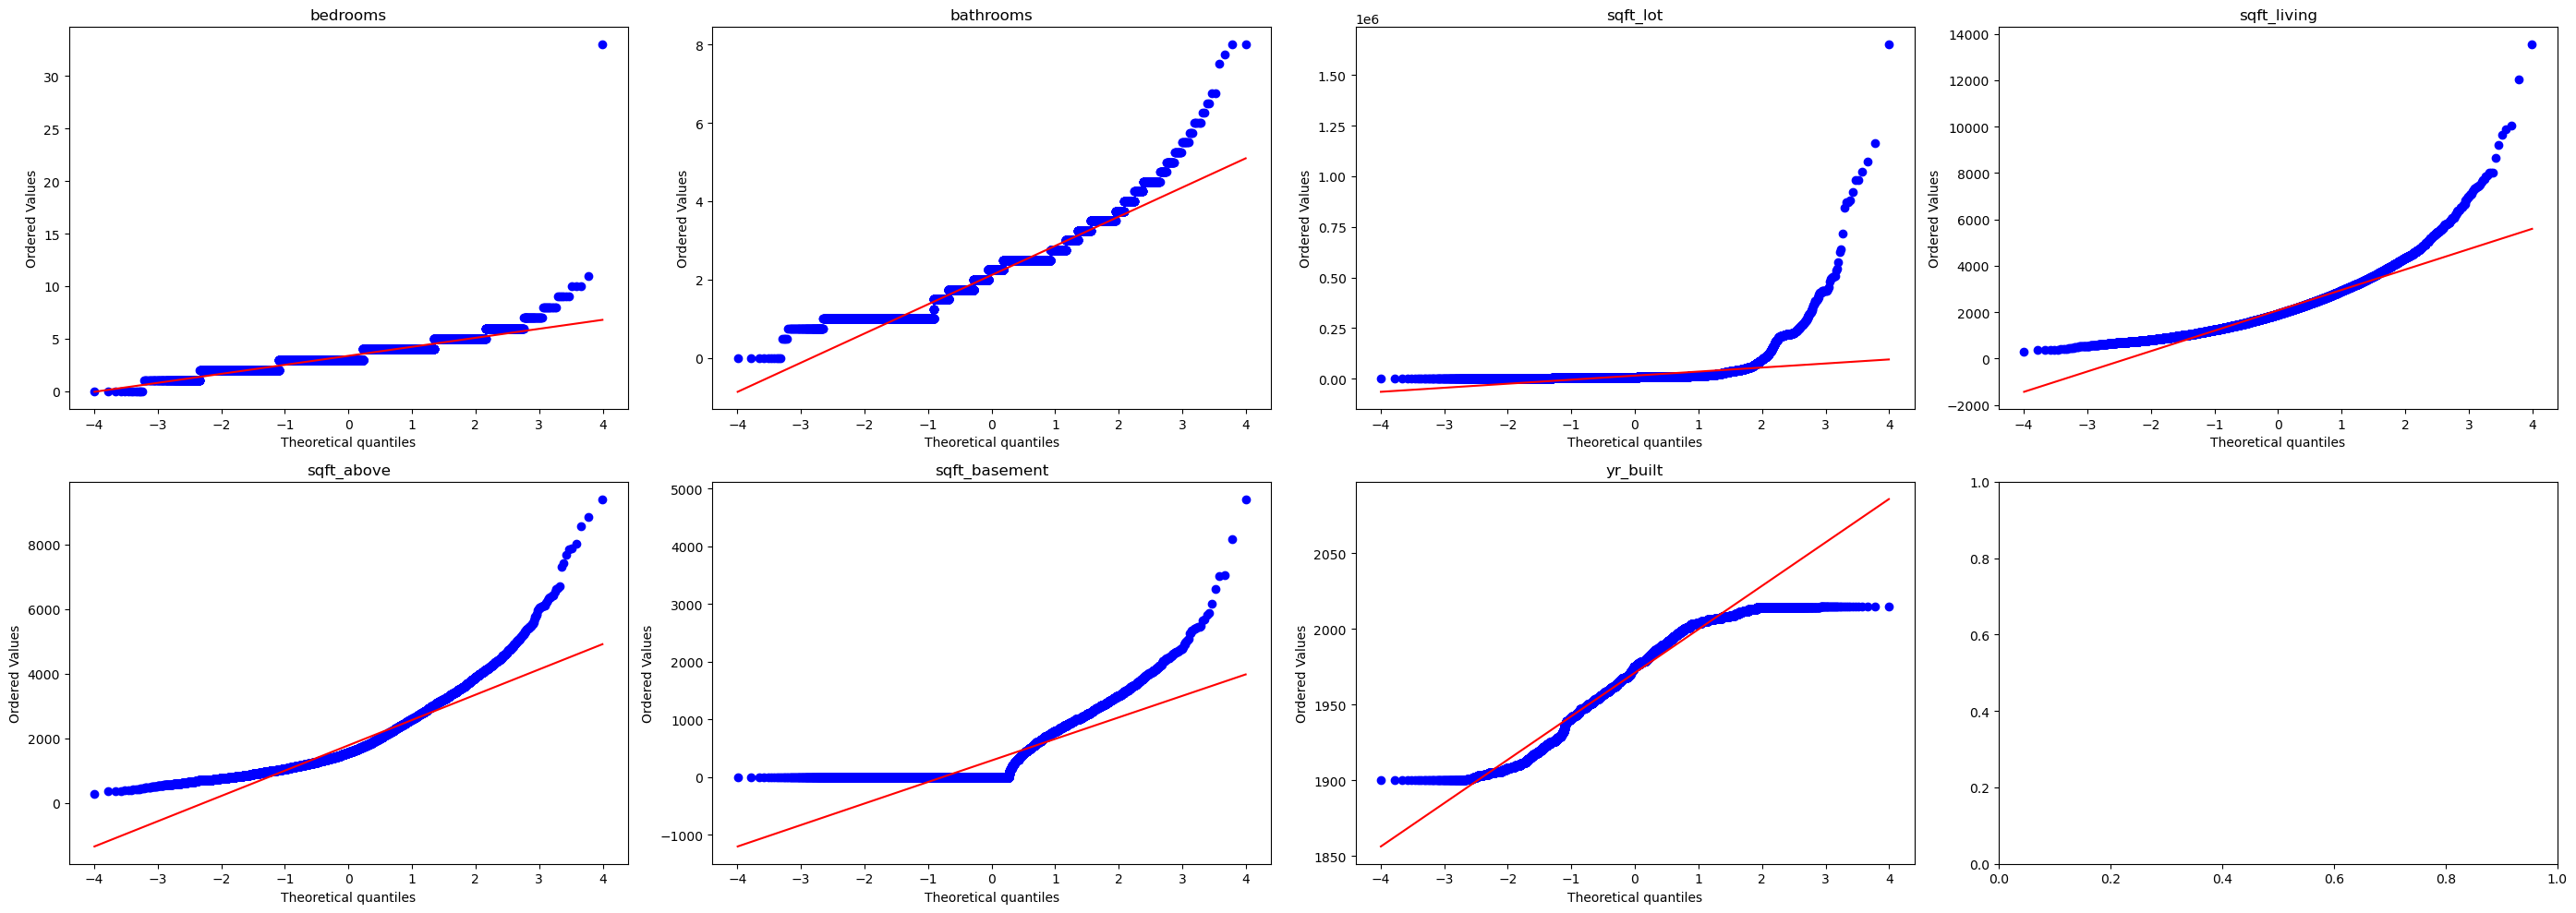

In [64]:
# Log Scaling 전 확률 플롯
ncols = 4
nrows = (len(log_col) + 3) // 4
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        idx = (r*ncols) + c
        if idx == len(log_col):
                break
        stats.probplot(df[log_col[idx]],plot=ax[r,c])
        ax[r,c].set_title(log_col[idx])
plt.tight_layout()
plt.show()

In [65]:
# Log Scaling
for col in log_col:
    df[col] = np.log1p(df[col])

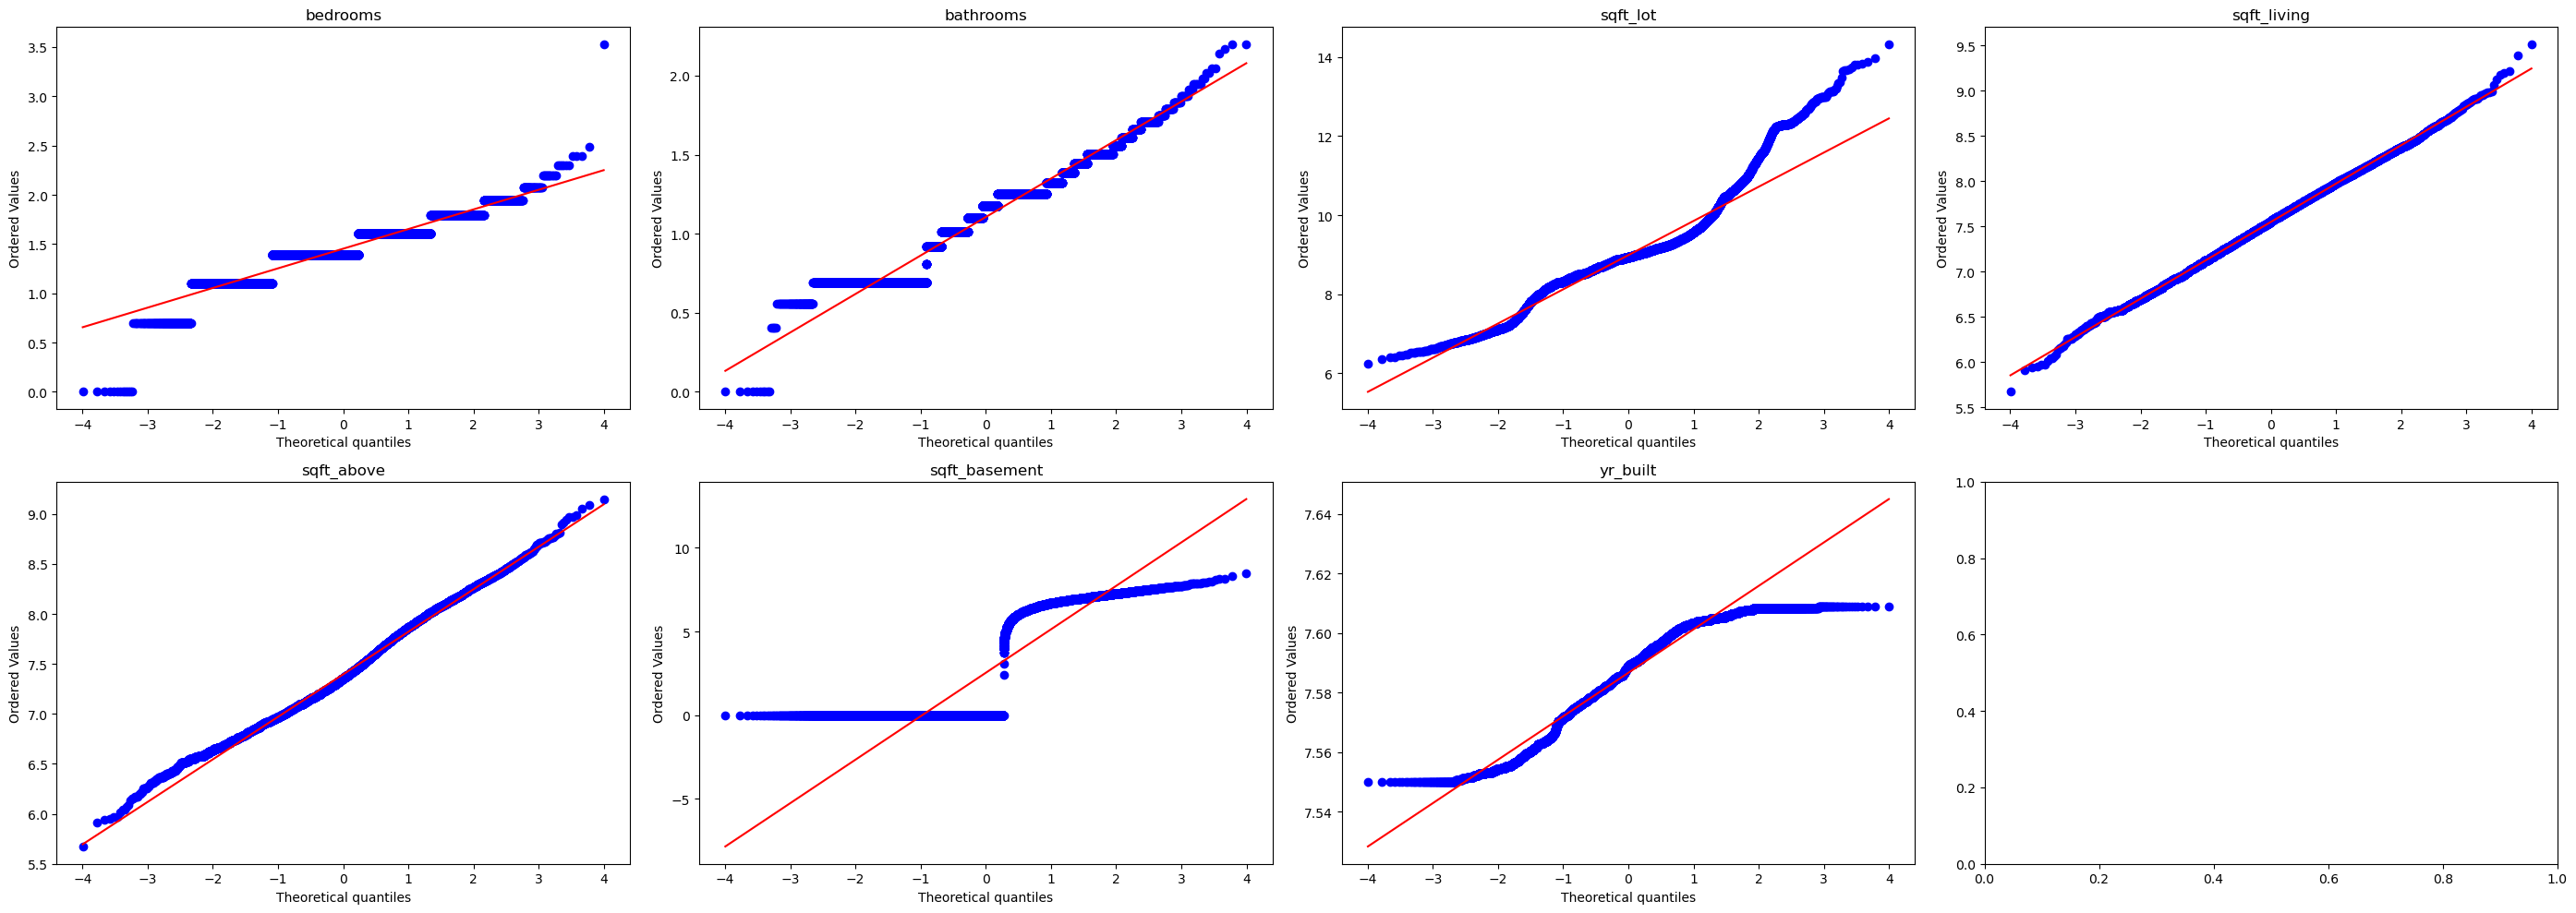

In [66]:
# Log Scaling 전 확률 플롯
ncols = 4
nrows = (len(log_col) + 3) // 4
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        idx = (r*ncols) + c
        if idx == len(log_col):
                break
        stats.probplot(df[log_col[idx]],plot=ax[r,c])
        ax[r,c].set_title(log_col[idx])
plt.tight_layout()
plt.show()

In [67]:
df = df[selected_col]

# 데이터 모델링 

In [68]:
sub = df.iloc[len_train:,:]
x = df.iloc[:len_train,:]

In [69]:
print(x.shape)
print(sub.shape)

(15035, 16)
(6468, 16)


## Random Forest - Baseline & Feature Importance 축출용

In [70]:
model = RandomForestRegressor(n_estimators=100, 
                              max_depth=10,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features=5,
                              n_jobs=-1,
                              random_state=36)

In [71]:
model.fit(x,y_train)

RandomForestRegressor(max_depth=10, max_features=5, n_jobs=-1, random_state=36)

In [72]:
feature_names = x.columns

In [73]:
importances = model.feature_importances_

# 추출된 피처 임포턴스 출력
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")


grade: 0.22370949387949413
condition: 0.004615926128168382
view: 0.023918528879146184
waterfront: 0.004773040324123681
year: 0.0006403655515916419
month: 0.0022767361996913877
zipcode: 0.022344956012663838
bedrooms: 0.009118553246458504
bathrooms: 0.043906756219234275
sqft_lot: 0.01982209366243119
sqft_living: 0.18837457054101583
sqft_above: 0.09373042966134087
sqft_basement: 0.016135441123932108
yr_built: 0.026526614158701646
lat: 0.28993097263533607
long: 0.030175521776670253


In [79]:
df_feature_importance_after = pd.DataFrame([importances],columns=feature_names)
df_feature_importance_after.T.sort_values(by=0,ascending=False)

,0
lat,0.289931
grade,0.223709
sqft_living,0.188375
sqft_above,0.093730
bathrooms,0.043907
long,0.030176
yr_built,0.026527
view,0.023919
zipcode,0.022345
sqft_lot,0.019822


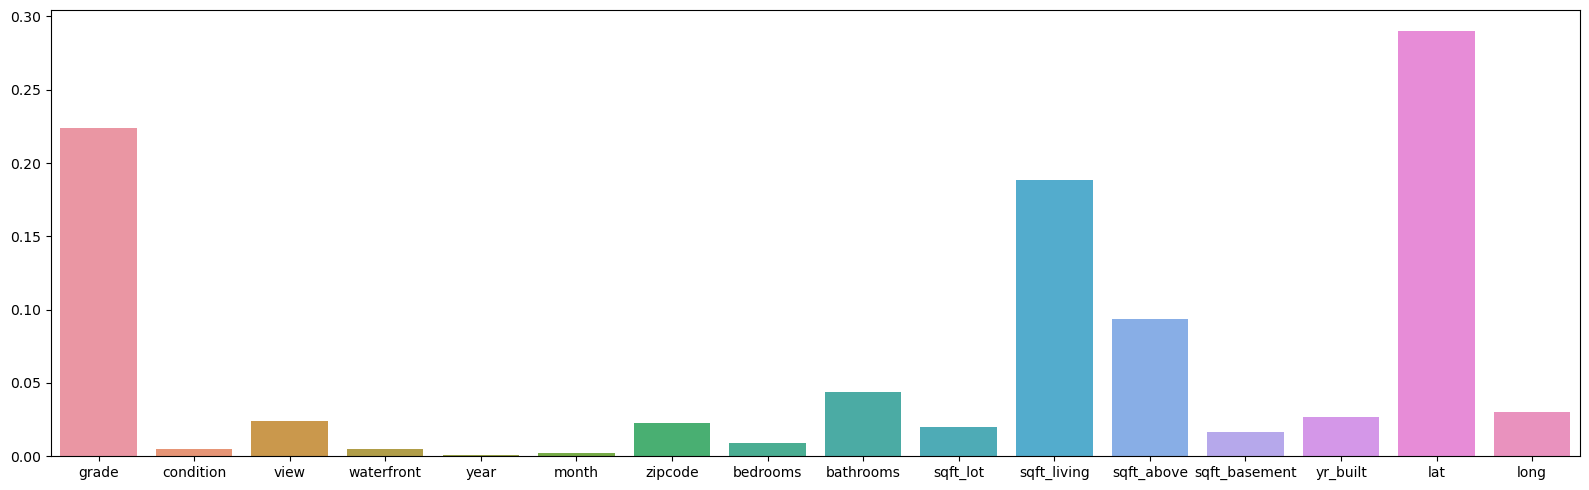

In [78]:
plt.figure(figsize=(16,5))
sns.barplot(x=feature_names,y=importances)
plt.tight_layout()
plt.show()

----

In [ ]:
model.predict()

### Grid Search

### Model Pipeline

In [58]:
gboost = GradientBoostingRegressor(random_state=36)
xgboost = xgb.XGBRegressor(random_state=36)
lightgbm = lgb.LGBMRegressor(random_state=36)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation 

In [60]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y_train, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

In [61]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8775
Model: XGBoost, CV score:0.8955
Model: LightGBM, CV score:0.9003


### Average Blending 

# Submission

## 3. 모델링
### Average Blending
여러가지 모델의 결과를 산술 평균을 통해 Blending 모델을 만들겠습니다.

### Cross Validation
교차 검증을 통해 모델의 성능을 간단히 평가하겠습니다.

In [ ]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), 
                                             kf=kfold))

In [ ]:
get_cv_score(models)

### Make Submission

회귀 모델의 경우에는 cross_val_score 함수가 R<sup>2</sup>를 반환합니다.<br>
R<sup>2</sup> 값이 1에 가까울수록 모델이 데이터를 잘 표현함을 나타냅니다. 3개 트리 모델이 상당히 훈련 데이터에 대해 괜찮은 성능을 보여주고 있습니다.<br> 훈련 데이터셋으로 3개 모델을 학습시키고, Average Blending을 통해 제출 결과를 만들겠습니다.

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [ ]:
y_pred = AveragingBlending(models, x, y, sub)

In [ ]:
sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})

In [ ]:
sub.to_csv('submission.csv', index=False)